In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.dates as mdates

In [54]:
EV = pd.read_csv("Data.csv", sep=';')
# Exibindo o DataFrame resultante
print(EV.head())

           Start date           Stop date Network          Fleet report_ev  \
0  05/31/2023 | 13:46  05/31/2023 | 19:08    EVIO  Frota Capwatt  AA-99-AA   
1  05/31/2023 | 13:46  05/31/2023 | 13:46    EVIO  Frota Capwatt  AA-99-AA   
2  05/30/2023 | 09:32  05/30/2023 | 13:29    EVIO  Frota Capwatt  AA-99-AA   
3  05/26/2023 | 18:51  05/26/2023 | 19:13    EVIO  Frota Capwatt  AA-99-AA   
4  05/24/2023 | 18:42  05/24/2023 | 19:17    EVIO  Frota Capwatt  AA-99-AA   

    Group        User   Charging Station     City Duration (min)  ...  \
0  Others  José Silva  CAP_SON_MAI_00010  Moreira        321,983  ...   
1  Others  José Silva  CAP_SON_MAI_00010  Moreira            0,1  ...   
2  Others  José Silva  CAP_SON_MAI_00004     Maia          237,1  ...   
3  Others  José Silva  CAP_SON_MAI_00002     Maia          22,55  ...   
4  Others  José Silva  CAP_SON_MAI_00002     Maia           35,3  ...   

  Cost incl. IVA     Status  Temp Plus Unnamed: 34 Unnamed: 35 Unnamed: 36  \
0           5,

In [6]:
plus = pd.read_csv("PLUS.csv", sep = ';')
print(plus.head())

         Date  Plus  Unnamed: 2
0  06.06.2022  0,00         NaN
1  07.06.2022  0,00         NaN
2  08.06.2022  0,05         NaN
3  09.06.2022  0,00         NaN
4  10.06.2022  0,00         NaN


In [31]:
import pandas as pd

# Carregar os dados do arquivo Data.csv
data = pd.read_csv("Data.csv", sep=";")
data = data.iloc[:, :33]
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
#data['Start date'] = pd.to_datetime(data['Start date'], format='%m/%d/%Y', errors='coerce')
data['Start date'] = pd.to_datetime(data['Start date'].str.split('|').str[0].str.strip(), format='%m/%d/%Y', errors='coerce')
print("Data.csv antes:")
print(data.head())


# Carregar os dados do arquivo PLUS.csv
plus = pd.read_csv("PLUS.csv", sep=";")
plus = plus.drop(columns=['Unnamed: 2'])
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
#plus['Date'] = pd.to_datetime(plus['Date'], format='%m/%d/%Y', errors='coerce')

print("\nPLUS.csv antes:")
print(plus.head())

# Mesclar os dois DataFrames usando as colunas de data corretas
merged_data = pd.merge_asof(data.sort_values('Start date'), plus.sort_values('Date'), left_on='Start date', right_on='Date', direction='nearest')

merged_data = merged_data.drop(columns=['Date'])

# Salvar o resultado no arquivo Data_merged.csv
merged_data.to_csv("Data_merged.csv", index=False, sep=";")
print("\nData.csv após a mesclagem:")
print(merged_data.head())


Data.csv antes:
  Start date           Stop date Network          Fleet report_ev   Group  \
0 2023-05-31  05/31/2023 | 19:08    EVIO  Frota Capwatt  AA-99-AA  Others   
1 2023-05-31  05/31/2023 | 13:46    EVIO  Frota Capwatt  AA-99-AA  Others   
2 2023-05-30  05/30/2023 | 13:29    EVIO  Frota Capwatt  AA-99-AA  Others   
3 2023-05-26  05/26/2023 | 19:13    EVIO  Frota Capwatt  AA-99-AA  Others   
4 2023-05-24  05/24/2023 | 19:17    EVIO  Frota Capwatt  AA-99-AA  Others   

         User   Charging Station     City Duration (min)  ...  \
0  José Silva  CAP_SON_MAI_00010  Moreira        321,983  ...   
1  José Silva  CAP_SON_MAI_00010  Moreira            0,1  ...   
2  José Silva  CAP_SON_MAI_00004     Maia          237,1  ...   
3  José Silva  CAP_SON_MAI_00002     Maia          22,55  ...   
4  José Silva  CAP_SON_MAI_00002     Maia           35,3  ...   

  MOBIE TAR total (€) MOBIE CPO total (€)  MOBIE E-mobility support (€)  \
0                   -                   -              

C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_6176\4261073422.py:17: UserWarning: Parsing '13.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_6176\4261073422.py:17: UserWarning: Parsing '14.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_6176\4261073422.py:17: UserWarning: Parsing '15.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_6176\4261073422.py:17: UserWarning: Parsing '16.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

In [32]:
EV = pd.read_csv("EVIO_history_01-06-2022_31-05-2023.csv", sep=';')

# Convert strings to float
EV['Duration (min)'] = EV['Duration (min)'].str.replace(',', '.').astype(float)
EV['Total Energy (kWh)'] = EV['Total Energy (kWh)'].str.replace(',', '.').astype(float)
EV['Start date'] = pd.to_datetime(EV['Start date'], format='%m/%d/%Y | %H:%M')
EV['Stop date'] = pd.to_datetime(EV['Stop date'], format='%m/%d/%Y | %H:%M')

# Crie uma nova coluna 'Period of Day' com base na hora
EV['Period of Day'] = pd.cut(EV['Start date'].dt.hour, bins=[0, 12, 18, 24], labels=['Manhã', 'Tarde', 'Noite'])

# Adicione a coluna 'Day of Week'
EV['Day of Week'] = EV['Start date'].dt.day_name()

# Crie uma nova coluna 'Season' com base no mês (usando o hemisfério norte como referência)
EV['Month'] = EV['Start date'].dt.month
EV['Season'] = EV['Month'].apply(lambda x: 'Inverno' if x in [1, 2, 12] else ('Primavera' if x in [3, 4, 5] else ('Verão' if x in [6, 7, 8] else 'Outono')))

# Crie uma nova coluna 'Período Escolar' com base no mês
EV['Período Escolar'] = EV['Month'].apply(lambda x: 'Férias' if x in [7, 8] else 'Período Escolar')

# Exibindo o DataFrame resultante
print(EV.head())

           Start date           Stop date Network          Fleet report_ev  \
0 2023-05-31 13:46:00 2023-05-31 19:08:00    EVIO  Frota Capwatt  AA-99-AA   
1 2023-05-31 13:46:00 2023-05-31 13:46:00    EVIO  Frota Capwatt  AA-99-AA   
2 2023-05-30 09:32:00 2023-05-30 13:29:00    EVIO  Frota Capwatt  AA-99-AA   
3 2023-05-26 18:51:00 2023-05-26 19:13:00    EVIO  Frota Capwatt  AA-99-AA   
4 2023-05-24 18:42:00 2023-05-24 19:17:00    EVIO  Frota Capwatt  AA-99-AA   

    Group        User   Charging Station     City  Duration (min)  ...  \
0  Others  José Silva  CAP_SON_MAI_00010  Moreira         321.983  ...   
1  Others  José Silva  CAP_SON_MAI_00010  Moreira           0.100  ...   
2  Others  José Silva  CAP_SON_MAI_00004     Maia         237.100  ...   
3  Others  José Silva  CAP_SON_MAI_00002     Maia          22.550  ...   
4  Others  José Silva  CAP_SON_MAI_00002     Maia          35.300  ...   

   MOBIE IEC total (€) Cost excl. IVA  VAT rate (%) Cost incl. IVA     Status  \
0    

In [9]:
# Aplicando one-hot encoding para as colunas categóricas
EV = pd.get_dummies(EV, columns=['Period of Day', 'Day of Week', 'Season', 'Período Escolar', 'Charging Station'], drop_first=True)

# Exibindo o DataFrame resultante
print(EV.head())

           Start date           Stop date Network          Fleet report_ev  \
0 2023-05-31 13:46:00 2023-05-31 19:08:00    EVIO  Frota Capwatt  AA-99-AA   
1 2023-05-31 13:46:00 2023-05-31 13:46:00    EVIO  Frota Capwatt  AA-99-AA   
2 2023-05-30 09:32:00 2023-05-30 13:29:00    EVIO  Frota Capwatt  AA-99-AA   
3 2023-05-26 18:51:00 2023-05-26 19:13:00    EVIO  Frota Capwatt  AA-99-AA   
4 2023-05-24 18:42:00 2023-05-24 19:17:00    EVIO  Frota Capwatt  AA-99-AA   

    Group        User     City  Duration (min)  Total Energy (kWh)  ...  \
0  Others  José Silva  Moreira         321.983               19.20  ...   
1  Others  José Silva  Moreira           0.100                0.00  ...   
2  Others  José Silva     Maia         237.100               45.13  ...   
3  Others  José Silva     Maia          22.550               28.57  ...   
4  Others  José Silva     Maia          35.300               25.98  ...   

  Day of Week_6  Day of Week_7 Season_2 Season_3 Season_4 Período Escolar_2  \
0

In [3]:
# Mapeando categorias para números
period_of_day_mapping = {'Manhã': 1, 'Tarde': 2, 'Noite': 3}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
season_mapping = {'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4}
periodo_escolar_mapping = {'Férias': 1, 'Período Escolar': 2}

EV['Period of Day'] = EV['Period of Day'].map(period_of_day_mapping)
EV['Day of Week'] = EV['Day of Week'].map(day_of_week_mapping)
EV['Season'] = EV['Season'].map(season_mapping)
EV['Período Escolar'] = EV['Período Escolar'].map(periodo_escolar_mapping)

# Exibindo o DataFrame resultante
print(EV.head())

           Start date           Stop date Network          Fleet report_ev  \
0 2023-05-31 13:46:00 2023-05-31 19:08:00    EVIO  Frota Capwatt  AA-99-AA   
1 2023-05-31 13:46:00 2023-05-31 13:46:00    EVIO  Frota Capwatt  AA-99-AA   
2 2023-05-30 09:32:00 2023-05-30 13:29:00    EVIO  Frota Capwatt  AA-99-AA   
3 2023-05-26 18:51:00 2023-05-26 19:13:00    EVIO  Frota Capwatt  AA-99-AA   
4 2023-05-24 18:42:00 2023-05-24 19:17:00    EVIO  Frota Capwatt  AA-99-AA   

    Group        User   Charging Station     City  Duration (min)  ...  \
0  Others  José Silva  CAP_SON_MAI_00010  Moreira         321.983  ...   
1  Others  José Silva  CAP_SON_MAI_00010  Moreira           0.100  ...   
2  Others  José Silva  CAP_SON_MAI_00004     Maia         237.100  ...   
3  Others  José Silva  CAP_SON_MAI_00002     Maia          22.550  ...   
4  Others  José Silva  CAP_SON_MAI_00002     Maia          35.300  ...   

   MOBIE IEC total (€) Cost excl. IVA  VAT rate (%) Cost incl. IVA     Status  \
0    

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Duration (min)', 'Period of Day', 'Day of Week', 'Season', 'Período Escolar']]
target = EV['Total Energy (kWh)']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicializando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Coeficientes e intercepto do modelo
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)


Mean Squared Error: 196.5936586170492
Coefficients: [ 0.04986481 -4.55339219 -0.3313801   1.32310978  3.33737563]
Intercept: 16.678779379581233


In [5]:
# Supondo que você tenha novos dados para prever
# Seus novos dados devem ter as mesmas características que foram usadas para treinar o modelo

novos_dados = pd.DataFrame({
    'Duration (min)': [80],
    'Period of Day': [2],  # Suponha que 'Tarde' seja codificado como 2
    'Day of Week': [4],  # Suponha que 'Thursday' seja codificado como 4
    'Season': [3],  # Suponha que 'Verão' seja codificado como 3
    'Período Escolar': [2]  # Suponha que 'Período Escolar' seja codificado como 2
})

# Fazendo a previsão com o modelo treinado
previsao_energia = model.predict(novos_dados)

print('Previsão de Energia (kWh):', previsao_energia[0])


Previsão de Energia (kWh): 20.8797396756718


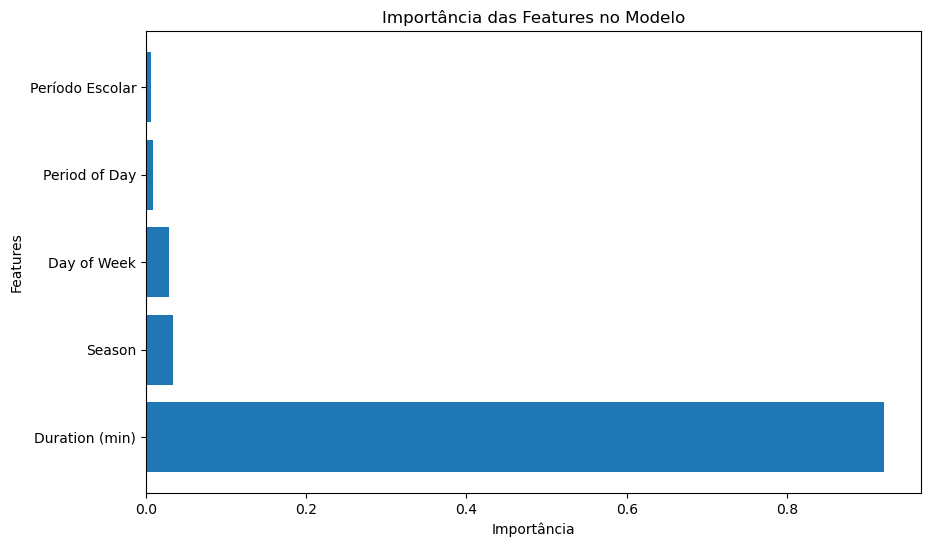

In [9]:
# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para melhor visualização
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})

# Ordenando as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features no Modelo')
plt.show()

Mean Squared Error: 77.31263688040008


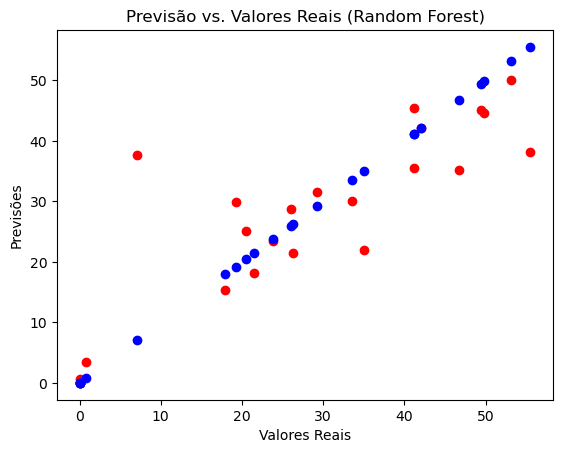

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Duration (min)', 'Period of Day', 'Day of Week', 'Season', 'Período Escolar']]
target = EV['Total Energy (kWh)']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicializando o modelo Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotando a previsão vs. os valores reais
#plt.scatter(y_test, y_pred)
# Plotando a previsão vs. os valores reais em cores diferentes
plt.scatter(y_test, y_pred, color='red', label='Previsões')
plt.scatter(y_test, y_test, color='blue', label='Valores Reais')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Previsão vs. Valores Reais (Random Forest)")
plt.show()


Mean Squared Error: 73.47840610362512


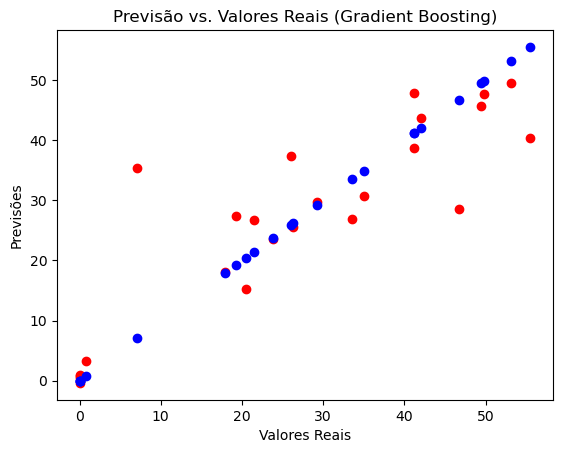

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Duration (min)', 'Period of Day', 'Day of Week', 'Season', 'Período Escolar']]
target = EV['Total Energy (kWh)']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicializando o modelo Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotando a previsão vs. os valores reais
plt.scatter(y_test, y_pred, color='red', label='Previsões')
plt.scatter(y_test, y_test, color='blue', label='Valores Reais')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Previsão vs. Valores Reais (Gradient Boosting)")
plt.show()


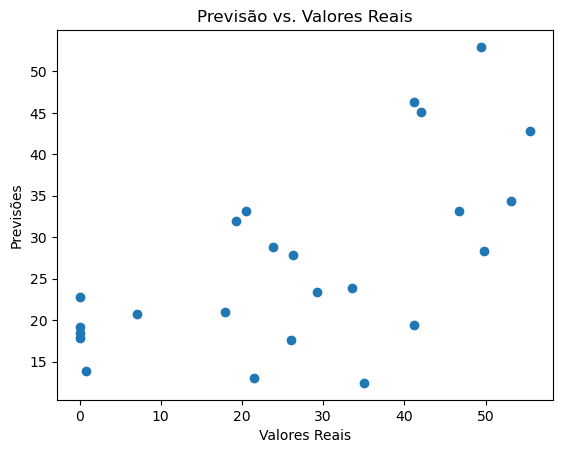

In [6]:
import matplotlib.pyplot as plt

# Plotando a previsão vs. os valores reais
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Previsão vs. Valores Reais")
plt.show()


In [28]:
# Adicionando uma coluna 'Predicted Energy' ao DataFrame com os valores previstos
EV['Predicted Energy'] = model.predict(features)

# Exibindo o DataFrame atualizado
print(EV.head())


           Start date           Stop date Network          Fleet report_ev  \
0 2023-05-31 13:46:00 2023-05-31 19:08:00    EVIO  Frota Capwatt  AA-99-AA   
1 2023-05-31 13:46:00 2023-05-31 13:46:00    EVIO  Frota Capwatt  AA-99-AA   
2 2023-05-30 09:32:00 2023-05-30 13:29:00    EVIO  Frota Capwatt  AA-99-AA   
3 2023-05-26 18:51:00 2023-05-26 19:13:00    EVIO  Frota Capwatt  AA-99-AA   
4 2023-05-24 18:42:00 2023-05-24 19:17:00    EVIO  Frota Capwatt  AA-99-AA   

    Group        User   Charging Station     City  Duration (min)  ...  \
0  Others  José Silva  CAP_SON_MAI_00010  Moreira         321.983  ...   
1  Others  José Silva  CAP_SON_MAI_00010  Moreira           0.100  ...   
2  Others  José Silva  CAP_SON_MAI_00004     Maia         237.100  ...   
3  Others  José Silva  CAP_SON_MAI_00002     Maia          22.550  ...   
4  Others  José Silva  CAP_SON_MAI_00002     Maia          35.300  ...   

   Cost excl. IVA VAT rate (%)  Cost incl. IVA     Status Period of Day  \
0          

In [32]:
print(EV[['Total Energy (kWh)', 'Predicted Energy']])

     Total Energy (kWh)  Predicted Energy
0                 19.20         31.954445
1                  0.00         15.903812
2                 45.13         32.606543
3                 28.57         16.360517
4                 25.98         17.659053
..                  ...               ...
112                0.00         17.784317
113                3.48         17.529452
114               14.34         17.825299
115               41.18         19.389409
116               40.19         28.748812

[117 rows x 2 columns]


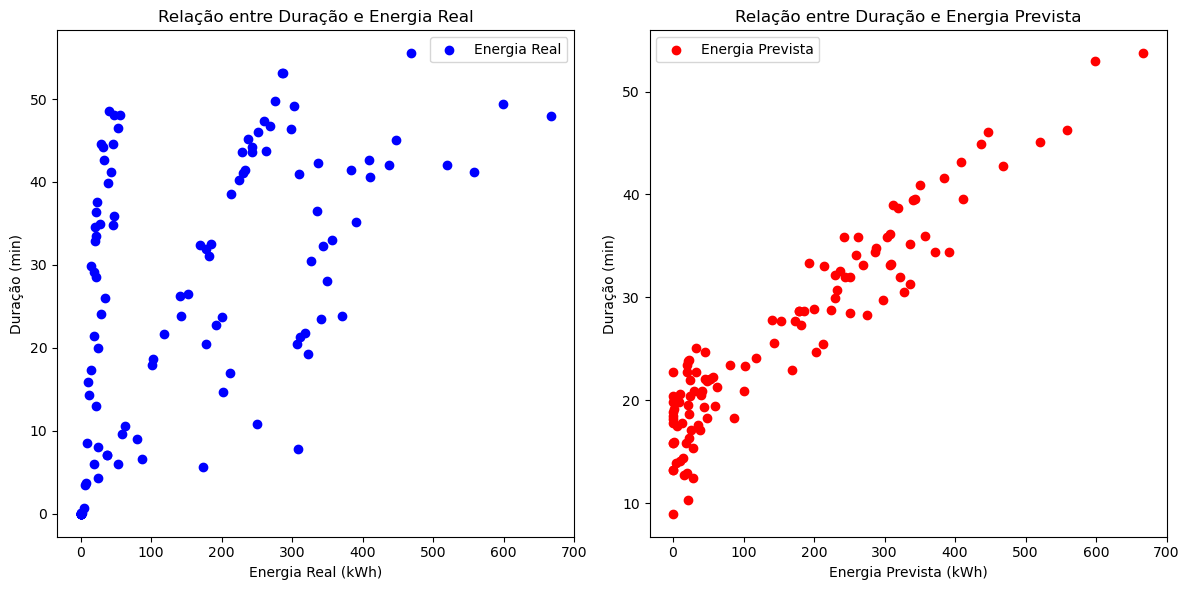

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gráfico para a relação entre duração e energia real
fig = plt.figure(figsize=(12, 6))

# Gráfico 2D para a relação entre duração e energia real
plt.subplot(1, 2, 1)
plt.scatter(EV['Duration (min)'], EV['Total Energy (kWh)'], color='blue', label='Energia Real')
plt.xlabel('Energia Real (kWh)')
plt.ylabel('Duração (min)')
plt.title('Relação entre Duração e Energia Real')
plt.legend()

# Gráfico para a relação entre duração e energia prevista
plt.subplot(1, 2, 2)
plt.scatter(EV['Duration (min)'], EV['Predicted Energy'], color='red', label='Energia Prevista')
plt.xlabel('Energia Prevista (kWh)')
plt.ylabel('Duração (min)')
plt.title('Relação entre Duração e Energia Prevista')
plt.legend()

plt.tight_layout()
plt.show()


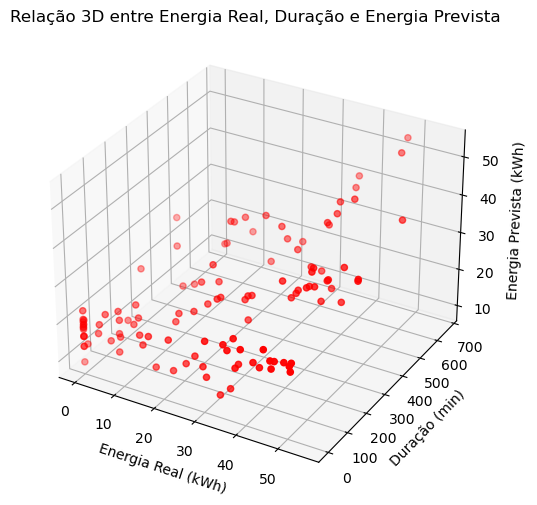

In [33]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(EV['Total Energy (kWh)'], EV['Duration (min)'], EV['Predicted Energy'], c='r', marker='o')

ax.set_xlabel('Energia Real (kWh)')
ax.set_ylabel('Duração (min)')
ax.set_zlabel('Energia Prevista (kWh)')

plt.title('Relação 3D entre Energia Real, Duração e Energia Prevista')
plt.show()
